## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [56]:
import numpy as np
from scipy import stats
import random as random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.stats import multivariate_normal as mn
%matplotlib inline

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

In [2]:
# settings
n = 50


# Checking which permutation is the best on small set
import itertools

a=[1,2,3,4,5,6,7]
b=[1,2,3,4,5,6,7]
new_b = list(itertools.permutations(b))
gap = []
for i in new_b:
    s = stats.spearmanr(a,i)[0]
    t = stats.kendalltau(a,i)[0]   
    gap.append(s-t)
mmin = gap.index(min(gap)) 
mmax = gap.index(max(gap))
print(new_b[mmin])
print(new_b[mmax])

(4, 5, 6, 7, 1, 2, 3)
(3, 2, 1, 7, 6, 5, 4)


#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

The original pearson correlation was: -1.0, but after eliminating 1 datapoint,we reached 1.0 pearson corr 

      X     Y
0  1.05  2.05
1  1.10  2.10
2  1.15  2.15
3  1.20  2.20
4  1.25  2.25


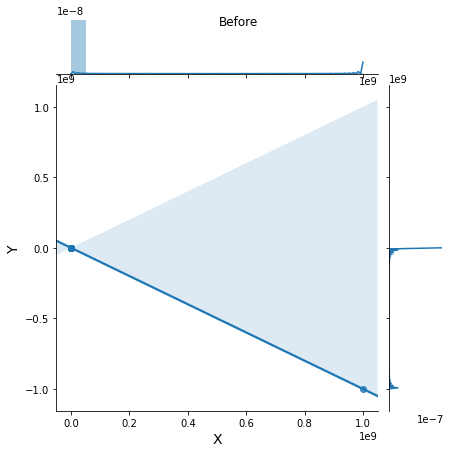

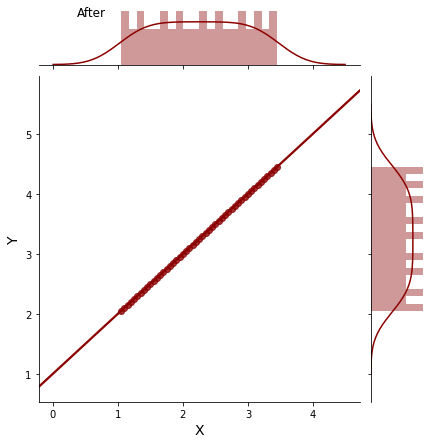

In [3]:

# initilizing 2 arrays

X = np.ones(n)
Y = np.ones(n)*2

t=0.05
for i in range(50):
    X[i] += t
    Y[i] += t
    t+=0.05
    
X[49] = 1_000_000_000
Y[49] = -1_000_000_000

X_new = X[:49]
Y_new = Y[:49]


# getting the corr

r = np.corrcoef(X, Y)
r_new = np.corrcoef(X_new, Y_new)

print(f'The original pearson correlation was: {r[0,1]}, but after eliminating 1 datapoint,we reached {round(r_new[0,1],4)} pearson corr \n')

# tabeling
data = np.array([X,Y])
data = data.transpose()
table = pd.DataFrame(data,columns=('X','Y'))
print(table.head())

# Original Jointplot
original = sns.jointplot(x=X, y=Y,marginal_kws=dict(bins=20), kind="reg")
original.fig.suptitle("Before")
original.set_axis_labels('X', 'Y', fontsize = 14)
plt.show()

# New Jointplot
new = sns.jointplot(x=X_new, y=Y_new,marginal_kws=dict(bins=20),color="darkred", kind="reg")
new.fig.suptitle("After", x=0.2)
new.set_axis_labels('X', 'Y', fontsize = 14)
plt.show()


#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

In this case, the gap between Tau to Spearman is 0.4794237695078031, which is greater than 0.45
   X   Y
0  1  25
1  2  26
2  3  27
3  4  28
4  5  29


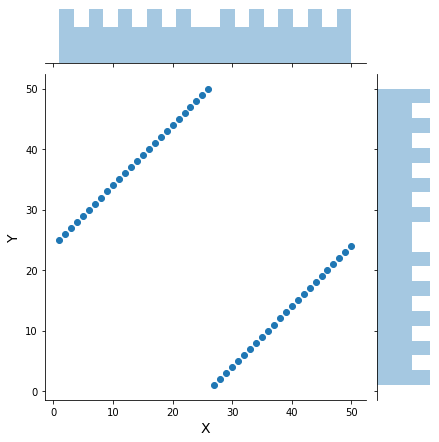

In [4]:
x_B=list(x for x in range(1,51))
half = len(x_B)//2
y_B=x_B[half-1:]+x_B[:half-1]

s_B = stats.spearmanr(x_B,y_B)[0]
t_B = stats.kendalltau(x_B,y_B)[0]   


print(f'In this case, the gap between Tau to Spearman is {t_B-s_B}, which is greater than 0.45')

# tabeling
data_b = np.array([x_B,y_B])
data_b = data_b.transpose()
table_b = pd.DataFrame(data_b,columns=('X','Y'))
print(table_b.head())

# Jointplot
jplo_b = sns.jointplot(x=x_B, y=y_B,marginal_kws=dict(bins=20))
jplo_b.set_axis_labels('X', 'Y', fontsize = 14)
plt.show()

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

In this case, the gap between Spearman to Tau is 0.4794237695078031, which is greater than 0.45
   X   Y
0  1  24
1  2  23
2  3  22
3  4  21
4  5  20


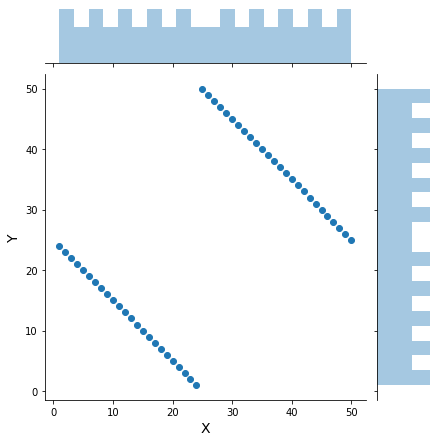

In [5]:
x_C=list(x for x in range(1,51))
half = len(x_C)//2
x_rev = x_C[::-1]
y_C=x_rev[half+1:]+x_rev[:half+1]

s_C = stats.spearmanr(x_C,y_C)[0]
t_C = stats.kendalltau(x_C,y_C)[0]   


print(f'In this case, the gap between Spearman to Tau is {s_C-t_C}, which is greater than 0.45')

# tabeling
data_c = np.array([x_C,y_C])
data_c = data_c.transpose()
table_c = pd.DataFrame(data_c,columns=('X','Y'))
print(table_c.head())

# Jointplot
jplo_c = sns.jointplot(x=x_C, y=y_C,marginal_kws=dict(bins=20))
jplo_c.set_axis_labels('X', 'Y', fontsize = 14)
plt.show()

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

The length of the dataset is: 50,
The Spearman corr is: 0.03331,
The Pearson corr is: -0.71318
Therefore Pearson is smaller than (Spearman+0.6)
   X   Y
0  2  -1
1  1  -2
2  1  -3
3  8 -10
4  1  -5


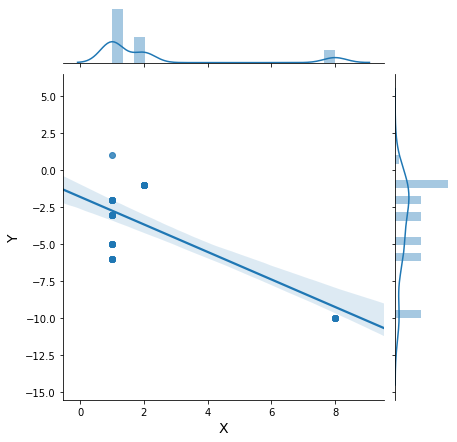

In [6]:
x_D = [2,1,1,8,1,1,2]*7
y_D = [-1,-2,-3,-10,-5,-6,-1]*7
x_D.append(1)
y_D.append(1)
s_D = stats.spearmanr(x_D,y_D)
r_D = np.corrcoef(x_D,y_D)

print(f'The length of the dataset is: {len(x_D)},\n'
      f'The Spearman corr is: {round(s_D[0],5)},\n'
      f'The Pearson corr is: {round(r_D[0,1],5)}\n'
      f'Therefore Pearson is smaller than (Spearman+0.6)')


# tabeling
data_d = np.array([x_D,y_D])
data_d = data_d.transpose()
table_d = pd.DataFrame(data_d,columns=('X','Y'))
print(table_d.head())

# Jointplot
jplo_d = sns.jointplot(x=x_D, y=y_D,marginal_kws=dict(bins=20), kind = "reg")
jplo_d.set_axis_labels('X', 'Y', fontsize = 14)
plt.show()

#### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

The length of the dataset is: 50,
The Spearman corr is: -0.24057,
The Pearson corr is: 0.99958
Therefore Pearson is greater than (Spearman+1.2)
      X     Y
0     2     1
1     1     2
2    10    -2
3  1000  1000
4     1    15


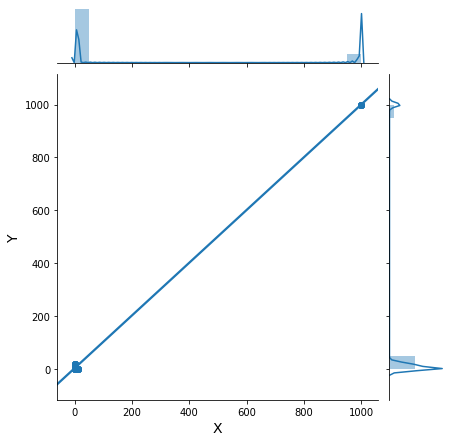

In [7]:
x_E = [2,1,10,1000,1,0,5]*7
y_E = [1,2,-2,1000,15,20,0]*7

x_E.append(1)
y_E.append(1)

s_E = stats.spearmanr(x_E,y_E)
r_E = np.corrcoef(x_E, y_E)

print(f'The length of the dataset is: {len(x_E)},\n'
      f'The Spearman corr is: {round(s_E[0],5)},'
    f'\nThe Pearson corr is: {round(r_E[0,1],5)}\n'
      f'Therefore Pearson is greater than (Spearman+1.2)')

# tabeling
data_e = np.array([x_E,y_E])
data_e = data_e.transpose()
table_e = pd.DataFrame(data_e,columns=('X','Y'))
print(table_e.head())

# Jointplot
jplo_e = sns.jointplot(x=x_E, y=y_E,marginal_kws=dict(bins=20), kind = "reg")
jplo_e.set_axis_labels('X', 'Y', fontsize = 14)
plt.show()

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

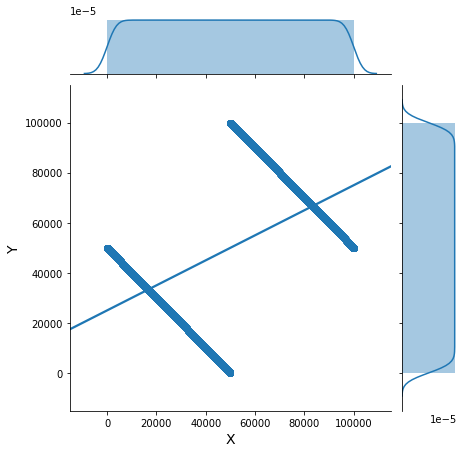

0.5000000000000001
1.000010000100001e-05


In [9]:
x_C=list(x for x in range(1,100000))
half = len(x_C)//2
x_rev = x_C[::-1]
y_C=x_rev[half+1:]+x_rev[:half+1]

s_C = stats.spearmanr(x_C,y_C)[0]
t_C = stats.kendalltau(x_C,y_C)[0]   

jplo_e = sns.jointplot(x=x_C, y=y_C,marginal_kws=dict(bins=20), kind = "reg")
jplo_e.set_axis_labels('X', 'Y', fontsize = 14)
plt.show()
print(s_C)
print(t_C)

<i>Impossible. </i>

<i>Both Spearman and Kendall correlation are rank correlations, which means hat they are ranking the datapoints according to some properties. 
Spearman is dealing with degree of association between two variables, while
Kendall is dealing with the strength of dependence between two variables.
Though the ranking methos differ, the difference cannot differ in a great number (such as 1.2) as they are both relativly correlation ranking. Moreover, it has shown (in the code above and in scintific methods) that they are differ by no more than 50%.</i>

<i>To address it deeply, we found a great study showing the ratio between the 2 and detrmine that is stands for 3/2 (which of course support the answer that such 1.2 gap cannot be valid).</i>

Link: http://www.ressources-actuarielles.net/EXT/ISFA/1226.nsf/0/70606dd23693cf69c1257827004cbe50/$FILE/rhotau.pdf


### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


In [10]:
########### settings ##############

df = pd.read_csv('heart.csv', sep='\t')

# fixing 2 features with incorrect values:
df.loc[df['ca']==4,'ca'] = np.NaN
df.loc[df['thal']==0,'thal'] = np.NaN

# Check NULL
print(df.isnull().sum())

# median for numeric features:
numeric_feat = ['age','trestbps','chol','thalach','oldpeak']

# mode for categorial features:
categ_feat = ['sex','cp','restecg','ca','thal','fbs']

# fixing the whole dataset
df[numeric_feat] = df[numeric_feat].fillna(df.median())
df[categ_feat] = df[categ_feat].fillna(df.mode().iloc[0])

###### Duplicates ##########
# shall we remove it?
duplicate = df.duplicated().sum()
duplicate = df[df.duplicated(keep=False)]
print(f'\nThere are {len(duplicate)} duplicates values:\n')
print(duplicate)
#############################


# checks
print(f'\nAfter fixing the data there are 0 NULL: \n')
print(df.isnull().sum())
print(np.shape(df))


age         8
sex         4
cp          5
trestbps    6
chol        6
fbs         3
restecg     2
thalach     4
exang       0
oldpeak     5
slope       0
ca          5
thal        2
target      0
dtype: int64

There are 2 duplicates values:

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
163  38.0  1.0  2.0     138.0  175.0  0.0      1.0    173.0      0      0.0   
164  38.0  1.0  2.0     138.0  175.0  0.0      1.0    173.0      0      0.0   

     slope   ca  thal  target  
163      2  0.0   2.0       1  
164      2  0.0   2.0       1  

After fixing the data there are 0 NULL: 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
(303, 14)


In [222]:
########### settings ##############

# df = pd.read_csv('heart.csv')

# ###### missing data #######
# # if found problems in "CA" where there is one more indicator (4) then reported, 
# # and in "THAL" which not correspond to the legend that is given, and contain one additional value (0 equals NULL - need to be fixed)

# df.loc[df['ca']==4,'ca'] = np.NaN
# df.loc[df['thal']==0,'thal'] = np.NaN
# # Using Median. I did not understand the other method
# df = df.fillna(df.mode().iloc[0])
# # print(df.isnull().sum())

# ###### Duplicates ##########
# # shall we remove it?
# duplicate = df.duplicated().sum()
# duplicate = df[df.duplicated(keep=False)]
# duplicate

# numeric_feat = ['age','trestbps','chol','thalach','oldpeak']

1. Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean.

In [11]:
# Function to compute CI and the correctness of the question
def get_CI(feat_name):
    stats = df.groupby(['target'])[feat_name].agg(['mean', 'count', 'std'])
    mean = []
    count = []
    std = []
    for i in stats.index:
        m, c, s = stats.loc[i]
        mean.append(m)
        count.append(c)
        std.append(s)
    diff_mean = mean[0]-mean[1]
    pooled_standard_deviation = math.sqrt( 
                          ((count[0] - 1)*std[0] * std[0] +
                         (count[1] - 1)*std[1] * std[1]) / 
                                      (count[0] + count[1] -2)) 
    high_95 = diff_mean + 1.96*pooled_standard_deviation*math.sqrt(1/count[0] + 1/count[1])
    low_95 = diff_mean - 1.96*pooled_standard_deviation*math.sqrt(1/count[0] + 1/count[1])
    print(round(low_95,4),round(high_95,4))
    if not low_95<0<high_95:
        return True

In [12]:
# printing all calculations over the relevant features
with_confidence = []
for feature in numeric_feat:
    print(f'{feature} CI is:')
    CI_test = get_CI(feature)
    if CI_test == True:
        with_confidence.append(feature)
    print('#'*20)

age CI is:
2.1763 6.1267
####################
trestbps CI is:
1.1943 8.9725
####################
chol CI is:
-2.9703 20.3213
####################
thalach CI is:
-24.0444 -14.6592
####################
oldpeak CI is:
0.745 1.2203
####################


In [13]:
# final statement
print(f'The following features are 95% confidence greater/smaller regarding the target: {with_confidence}')

The following features are 95% confidence greater/smaller regarding the target: ['age', 'trestbps', 'thalach', 'oldpeak']


2. Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.

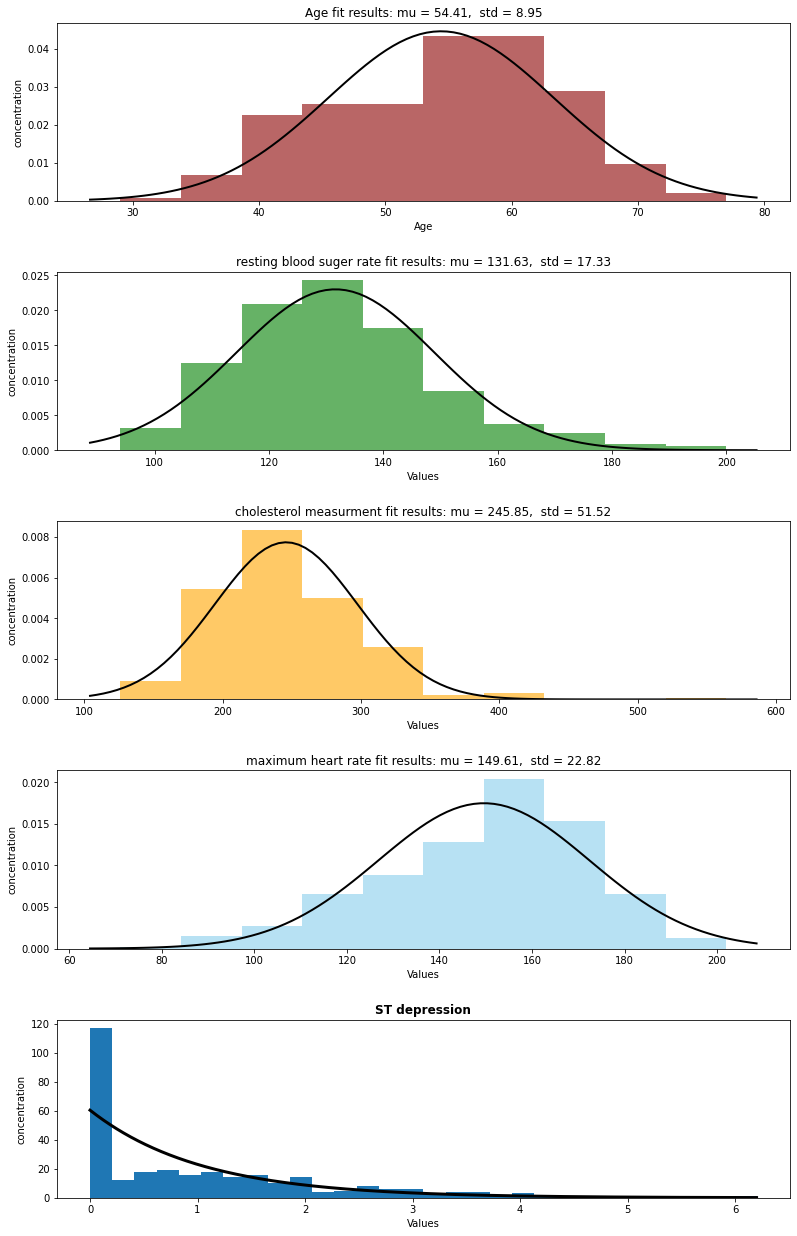

In [14]:
fig, axes = plt.subplots(5)
fig.set_size_inches(12, 18)
fig.tight_layout(pad=5.0)

## Age
mu_0, std_0 = stats.norm.fit(df[numeric_feat[0]])
axes[0].hist(df[numeric_feat[0]], bins=10, density=True, alpha=0.6, color='darkred')
xmin_0, xmax_0 = axes[0].get_xlim()
x_0 = np.linspace(xmin_0, xmax_0, 100)
p_0 = stats.norm.pdf(x_0, mu_0, std_0)
axes[0].plot(x_0, p_0, 'k', linewidth=2)
title_0 = "Age fit results: mu = %.2f,  std = %.2f" % (mu_0, std_0)
axes[0].set_title(title_0)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('concentration')


## trestbps
mu_1, std_1 = stats.norm.fit(df[numeric_feat[1]])
axes[1].hist(df[numeric_feat[1]], bins=10, density=True, alpha=0.6, color='g')
xmin_1, xmax_1 = axes[1].get_xlim()
x_1 = np.linspace(xmin_1, xmax_1, 100)
p_1 = stats.norm.pdf(x_1, mu_1, std_1)
axes[1].plot(x_1, p_1, 'k', linewidth=2)
title_1 = "resting blood suger rate fit results: mu = %.2f,  std = %.2f" % (mu_1, std_1)
axes[1].set_title(title_1)
axes[1].set_xlabel('Values')
axes[1].set_ylabel('concentration')

## chol
mu_2, std_2 = stats.norm.fit(df[numeric_feat[2]])
axes[2].hist(df[numeric_feat[2]], bins=10, density=True, alpha=0.6, color='orange')
xmin_2, xmax_2 = axes[2].get_xlim()
x_2 = np.linspace(xmin_2, xmax_2, 100)
p_2 = stats.norm.pdf(x_2, mu_2, std_2)
axes[2].plot(x_2, p_2, 'k', linewidth=2)
title_2 = "cholesterol measurment fit results: mu = %.2f,  std = %.2f" % (mu_2, std_2)
axes[2].set_title(title_2)
axes[2].set_xlabel('Values')
axes[2].set_ylabel('concentration')

## thalach
mu_3, std_3 = stats.norm.fit(df[numeric_feat[3]])
axes[3].hist(df[numeric_feat[3]], bins=10, density=True, alpha=0.6, color='skyblue')
xmin_3, xmax_3 = axes[3].get_xlim()
x_3 = np.linspace(xmin_3, xmax_3, 100)
p_3 = stats.norm.pdf(x_3, mu_3, std_3)
axes[3].plot(x_3, p_3, 'k', linewidth=2)
title_3 = "maximum heart rate fit results: mu = %.2f,  std = %.2f" % (mu_3, std_3)
axes[3].set_title(title_3)
axes[3].set_xlabel('Values')
axes[3].set_ylabel('concentration')

## oldpeak
st = df[numeric_feat[4]]
smean = st.mean()
rate = 1. / smean
smax = st.max()
days = np.linspace(0., smax, 1000)
dist_exp = stats.expon.pdf(days, scale=1. / rate)
nbins = 30
axes[4].hist(st, nbins)
axes[4].plot(days, dist_exp * len(st) * smax / nbins,'k', lw=3)
axes[4].set_title('ST depression',fontweight="bold")
axes[4].set_xlabel("Values")
axes[4].set_ylabel("concentration")

#displot(fit=lognormal)


plt.show()

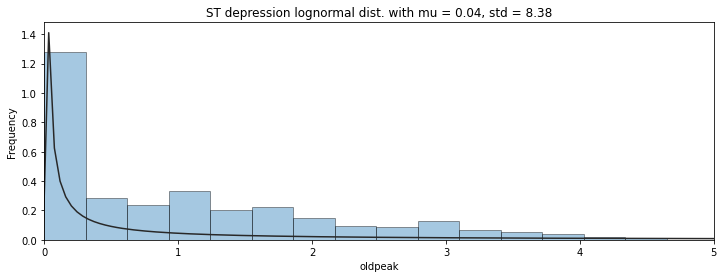

In [15]:
st = df[numeric_feat[4]]
fig, ax = plt.subplots()
fig.set_size_inches(12, 4)

ax = sns.distplot(st,hist=True, kde=False,norm_hist=False, bins=20, fit=stats.lognorm,
                  hist_kws={'edgecolor':'black', 'weights': np.ones(len(st))/len(st)})
ax.set_xlim(0, 5)

# ax = plt.gca()
# fig2, ax2 = plt.subplots()
# sns.distplot(st, color='b')
# sns.distplot(st, ax=ax2, kde=False, norm_hist=False, color='b',fit=stats.lognorm)
# ax.yaxis = ax2.yaxis

# Get the fitted parameters used by sns
sigma,loc,mu = stats.lognorm.fit(st)
plt.ylabel('Frequency')
plt.title(f'ST depression lognormal dist. with mu = {round(mu,2)}, std = {round(sigma,2)}')

# cross check
# x = np.logspace(0.1, 5, 303)
# pdf = stats.lognorm.pdf(x, sigma, loc, mu)

# ax.plot(x, pdf, 'r')

plt.show()


3. For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).

In [16]:
## Corr function to present the highest correlated
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = df[numeric_feat].corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

#### also valid for p-value
# new_df = df[numeric_feat]
# pvals = pd.DataFrame([[stats.pearsonr(new_df[c], new_df[y])[1] for y in new_df.columns] for c in new_df.columns],columns=new_df.columns, index=new_df.columns)
# pvals

# function calculating p-values for significans - higher than 0.95 confidence
def calculate_pvalues(df):
    are_sig = []
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(stats.pearsonr(df[r], df[c])[1], 4)
            if (pvalues[r][c])*2 < 0.05:
                if r == c:
                    pass
                else:
                    if [c,r] in are_sig:
                        pass
                    else:
                        are_sig.append([r,c])
   
    return pvalues, are_sig

Highest correlarted features: 

age       thalach    -0.401671
oldpeak   thalach    -0.330060
thalach   trestbps   -0.040378
          chol       -0.017785
chol      oldpeak     0.060661
          trestbps    0.115282
trestbps  oldpeak     0.194220
age       chol        0.208909
          oldpeak     0.218477
trestbps  age         0.256794
age       age              NaN
dtype: float64


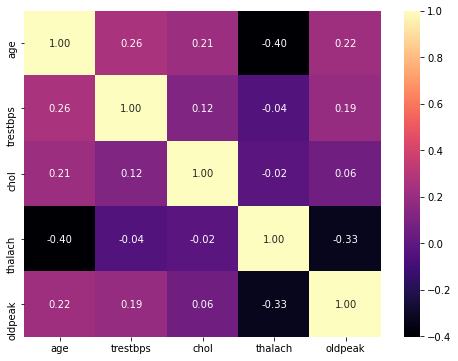

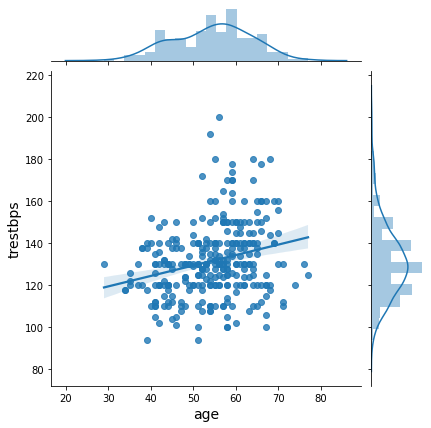

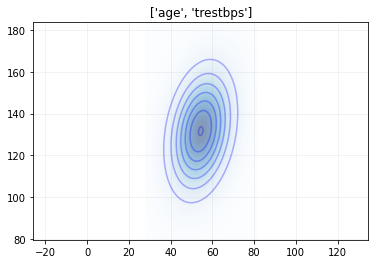

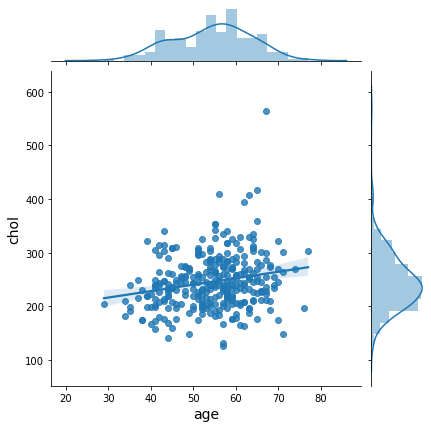

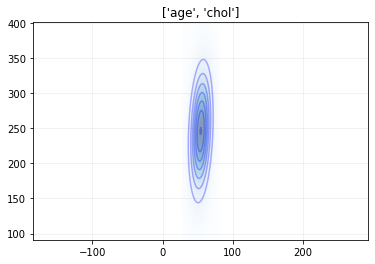

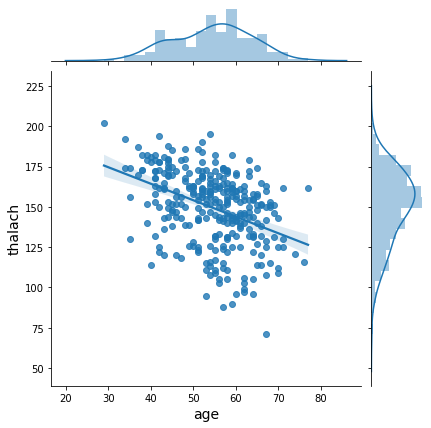

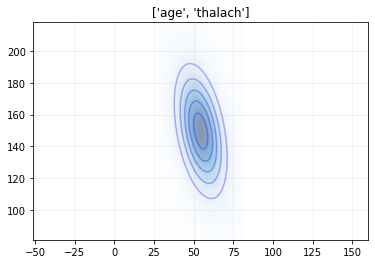

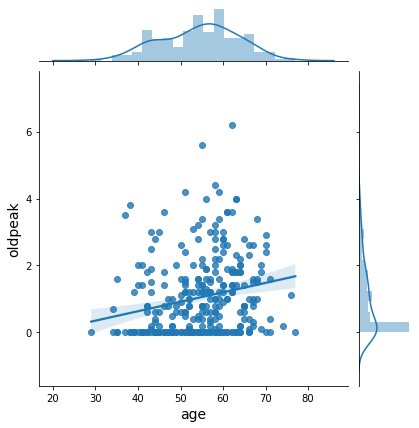

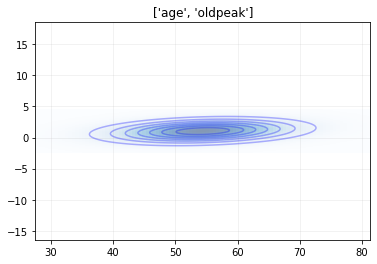

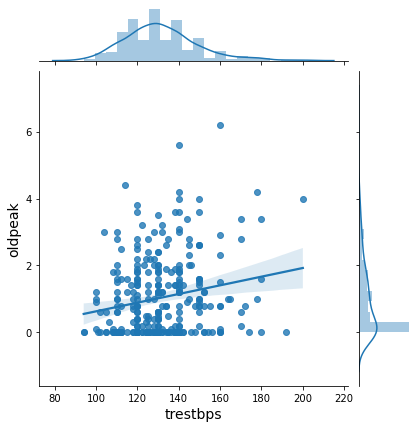

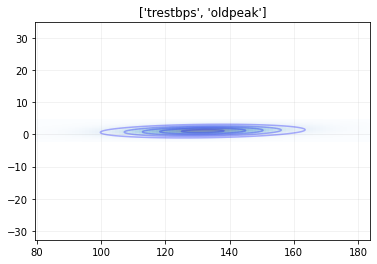

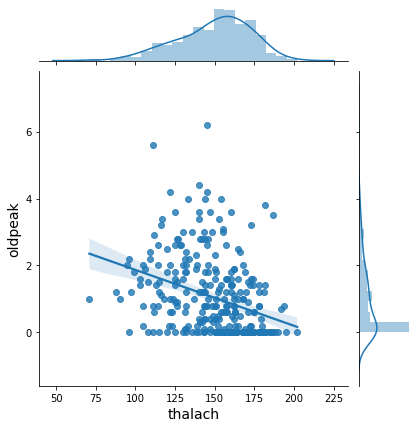

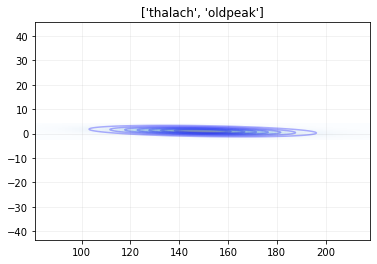

In [376]:

# Heatmap and correlations
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_feat].corr(),annot=True,cmap="magma",fmt='.2f')

# ## showing the most correlated featurs, bottom up:
print("Highest correlarted features: \n")
print(corrFilter(df[numeric_feat],0))

#significant calculation and returning a list of significant pairs (only one-time pair)
corr_pairs_lst = calculate_pvalues(df[numeric_feat])[1]
calculate_pvalues(df[numeric_feat])

# # Drawing jointpolots for each significant pair and the requested function

for i in range (len(corr_pairs_lst)):
    temp_plot = sns.jointplot(x=df[corr_pairs_lst[i][0]], y=df[corr_pairs_lst[i][1]],marginal_kws=dict(bins=20), kind="reg")
    temp_plot.set_axis_labels(corr_pairs_lst[i][0], corr_pairs_lst[i][1], fontsize = 14)
    temp_mean = np.array([np.mean(df[corr_pairs_lst[i][0]].values),np.mean(df[corr_pairs_lst[i][1]].values)])
    temp_cov = np.cov([df[corr_pairs_lst[i][0]].values,df[corr_pairs_lst[i][1]].values])
    temp_plot = plot_2d_Gaussian_pdf(temp_mean,temp_cov,corr_pairs_lst[i])
plt.show()
    

    
    # #     plt.title(f'{corr_pairs_lst[i][0]} to {corr_pairs_lst[i][1]}')

# # temp_mean = np.array([np.mean(df[corr_pairs_lst[0][0]].values),np.mean(df[corr_pairs_lst[i][0]].values)])
# # temp_cov = np.cov([df[corr_pairs_lst[0][0]].values,df[corr_pairs_lst[0][1]].values])
# # plot_2d_Gaussian_pdf2(temp_mean,temp_cov)



In [17]:
# Example code for bivariate pdfs

def plot_2d_Gaussian_pdf(means, cov,title):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
                alpha=0.3, colors='b')
    title=title
    ax.set_title(title)
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
# means = [3, 2]
# cov = [[1, 0.5], [0.5, 0.8]]
# plot_2d_Gaussian_pdf(means, cov)

4. Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?

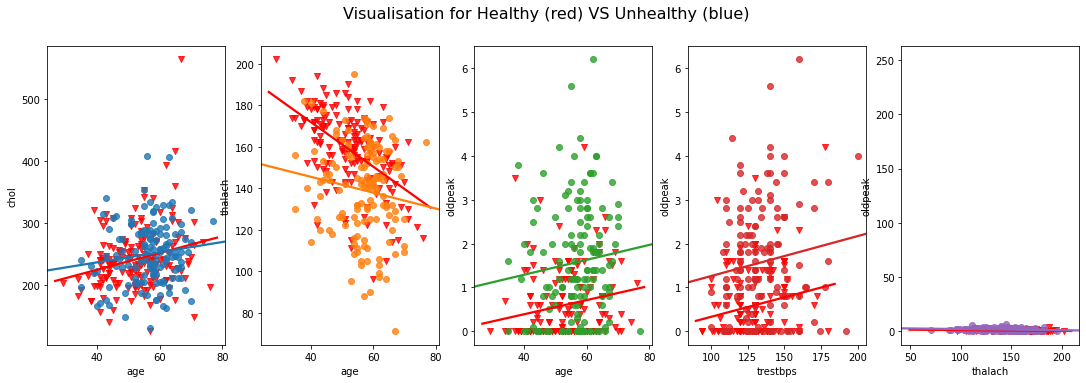

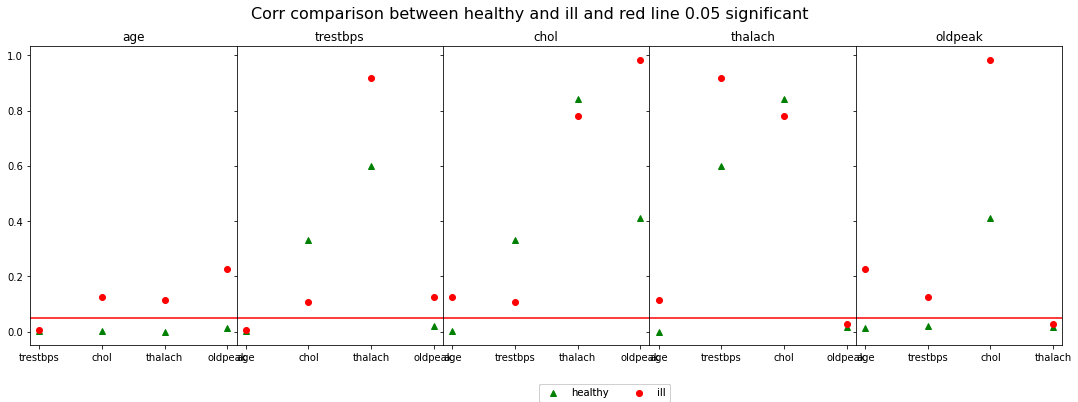

In [18]:

# setting dataframes as required
df_male = df[df['sex'] == 1]
df_female = df[df['sex'] == 0]
df_healthy = df[df['target'] == 1]
df_unhealthy = df[df['target'] == 0]

# Calculate significancy per new dataframe
corr_pairs_male = calculate_pvalues(df_male[numeric_feat])[1]
corr_pairs_female = calculate_pvalues(df_female[numeric_feat])[1]
corr_pairs_healthy = calculate_pvalues(df_healthy[numeric_feat])[1]
corr_pairs_unhealthy = calculate_pvalues(df_unhealthy[numeric_feat])[1]

# Female VS Male
female_unique_corr = corr_pairs_female.copy()
male_unique_corr = []

for corr in corr_pairs_male:
    if corr in corr_pairs_female:
        female_unique_corr.remove(corr)
    else:
        male_unique_corr.append(corr)

# Healthy VS Unhealthy
unhealthy_unique_corr = corr_pairs_unhealthy.copy()
healthy_unique_corr = []

for corr in corr_pairs_healthy:
    if corr in corr_pairs_unhealthy:
        unhealthy_unique_corr.remove(corr)
    else:
        healthy_unique_corr.append(corr)

# print(f'There are {len(healthy_unique_corr)} significant correlated pairs in healthy which are not in unhealthy:\n'
#       f'{healthy_unique_corr}\n'
#       f'There are {len(female_unique_corr)} significant correlated pairs in female which are not in male:\n'
#       f'{female_unique_corr}')


fig1, axes = plt.subplots(1, len(healthy_unique_corr))
fig1.set_size_inches(18.5, 5.5)

fig1.suptitle('Visualisation for Healthy (red) VS Unhealthy (blue)', fontsize=16)
for i in range(len(healthy_unique_corr)): 
    sns.regplot(x=df_healthy[healthy_unique_corr[i][0]], 
                y=df_healthy[healthy_unique_corr[i][1]],
                ci=None,marker = "v", color = 'r', ax=axes[i])
    sns.regplot(x=df_unhealthy[healthy_unique_corr[i][0]], 
                y=df_unhealthy[healthy_unique_corr[i][1]],
                ci=None, ax=axes[i])
plt.show()


fig, axs = plt.subplots(1, 5, sharey=True)

fig.set_size_inches(18.5, 5.5)  
fig.subplots_adjust(wspace=0)
fig.suptitle('Corr comparison between healthy and ill and red line 0.05 significant', fontsize=16)

table_corr_1, list_corr = calculate_pvalues(df_healthy[numeric_feat])
table_corr_2, list_corr_2 = calculate_pvalues(df_unhealthy[numeric_feat])

for i in range(len(numeric_feat)):
    result = pd.concat([table_corr_1[numeric_feat[i]],table_corr_2[numeric_feat[i]]],axis=1)
    result.columns = ["healthy","ill"]
    result_2 = result.copy()
    result_2 = result.drop(numeric_feat[i])

    axs[i].plot(result_2['healthy'],'g^' ,label='healthy')
    axs[i].plot(result_2['ill'],'ro', label='ill')
    axs[i].axhline(y=0.05, color='r', linestyle='-')
    axs[i].set_title(numeric_feat[i])
    fig.legend( ['healthy','ill'],loc = (0.5, 0), ncol=5 )
plt.show()


5. For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

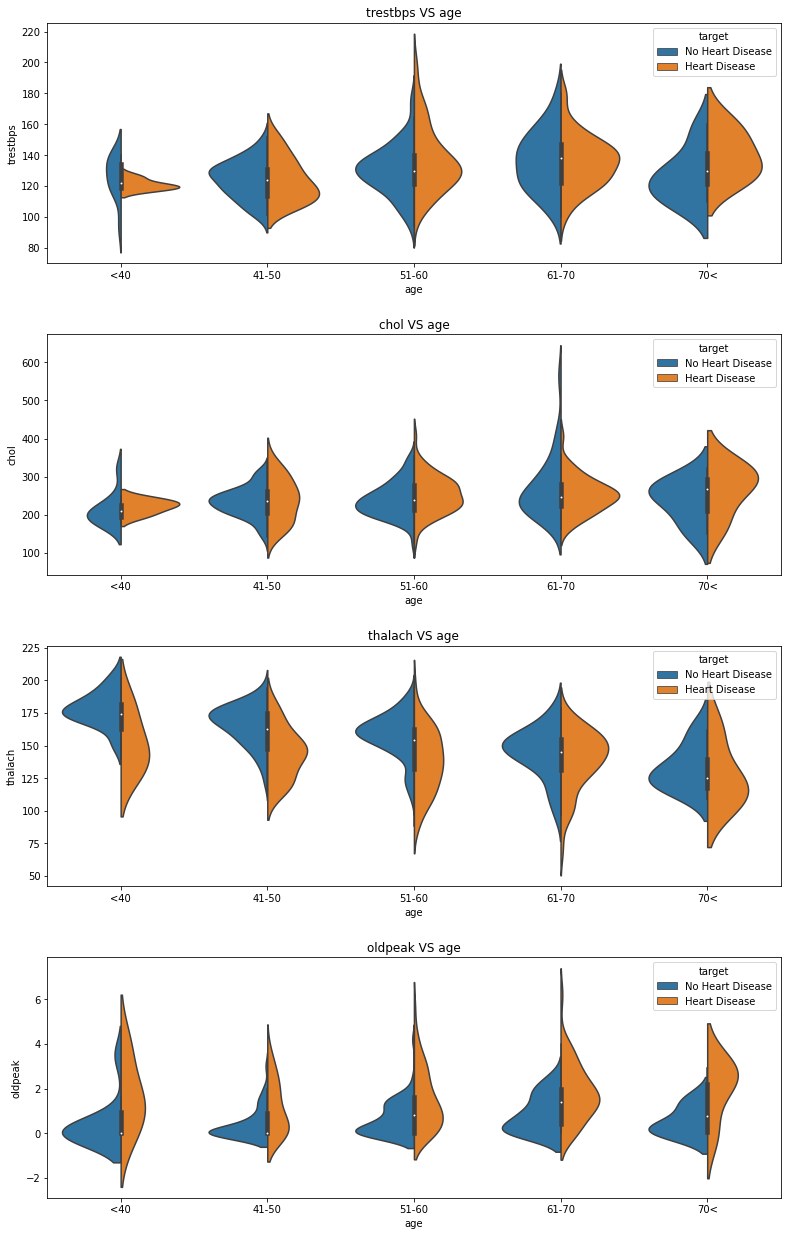

In [19]:
def chng(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df2 = df.copy()
df2['target'] = df2['target'].apply(chng)

#settings
df_grouped_by_age = df2.copy()
group_labels = ['<40','41-50','51-60','61-70','70<']

df_grouped_by_age.loc[df_grouped_by_age['age'] < 40, 'age'] = 39
df_grouped_by_age.loc[(df_grouped_by_age['age'] >= 40) & (df_grouped_by_age['age'] < 50) , 'age'] = 49
df_grouped_by_age.loc[(df_grouped_by_age['age'] >= 50) & (df_grouped_by_age['age'] < 60) , 'age'] = 59
df_grouped_by_age.loc[(df_grouped_by_age['age'] >= 60) & (df_grouped_by_age['age'] < 70) , 'age'] = 69
df_grouped_by_age.loc[df_grouped_by_age['age'] >= 70, 'age'] = 70

df_grouped_by_age['age'] = df_grouped_by_age['age'].replace([39],'<40')
df_grouped_by_age['age'] = df_grouped_by_age['age'].replace([49],'41-50')
df_grouped_by_age['age'] = df_grouped_by_age['age'].replace([59],'51-60')
df_grouped_by_age['age'] = df_grouped_by_age['age'].replace([69],'61-70')
df_grouped_by_age['age'] = df_grouped_by_age['age'].replace([70],'70<')


fig, axes = plt.subplots(4)
fig.set_size_inches(12, 18)
fig.tight_layout(pad=5.0)


# trestbps
trestbps_df = df_grouped_by_age[['trestbps','age','target']]
trestbps_violin = sns.violinplot(y="trestbps", x="age", order = group_labels, hue = 'target', data=trestbps_df, ax = axes[0],split=True)
trestbps_violin.set_title('trestbps VS age')
# trestbps_violin.fig.get_axes().legend(title= 'smoker',loc='top left',labels=['healthy', 'unhealty'],edgecolor='red',facecolor='blue',ncol=2)
# chol
chol_df = df_grouped_by_age[['chol','age','target']]
chol_violin = sns.violinplot(y="chol", x="age", order = group_labels, data=chol_df, ax = axes[1], hue = 'target',split=True)
chol_violin.set_title('chol VS age')

# thalach
thalach_df = df_grouped_by_age[['thalach','age','target']]
thalach_violin = sns.violinplot(y="thalach", x="age", order = group_labels, data=thalach_df, ax = axes[2], hue = 'target',split=True)
thalach_violin.set_title('thalach VS age')

# oldpeak
oldpeak_df = df_grouped_by_age[['oldpeak','age','target']]
oldpeak_violin = sns.violinplot(y="oldpeak", x="age", order = group_labels, data=oldpeak_df, ax = axes[3], hue = 'target',split=True)
oldpeak_violin.set_title('oldpeak VS age')

plt.show()

6. Suggest, state and address at least one original question.

The difference mean between ill and healthy people regarding cholesterol is in betweenthe values -2.9703223607705667 to 20.32131050306303, which is insignificant in 95% confidance


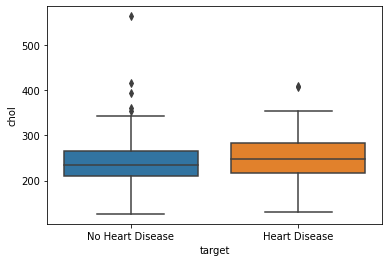

In [20]:
stats = df.groupby(['target'])['chol'].agg(['mean', 'count', 'std'])
mean = []
count = []
std = []
for i in stats.index:
    m, c, s = stats.loc[i]
    mean.append(m)
    count.append(c)
    std.append(s)
diff_mean = mean[0]-mean[1]
pooled_standard_deviation = math.sqrt( 
                      ((count[0] - 1)*std[0] * std[0] +
                     (count[1] - 1)*std[1] * std[1]) / 
                                  (count[0] + count[1] -2)) 
high_95 = diff_mean + 1.96*pooled_standard_deviation*math.sqrt(1/count[0] + 1/count[1])
low_95 = diff_mean - 1.96*pooled_standard_deviation*math.sqrt(1/count[0] + 1/count[1])

print(f'The difference mean between ill and healthy people regarding cholesterol is in between'
      f'the values {low_95} to {high_95}, which is insignificant in 95% confidance')


df3 = df2[['chol','target']]
sns.boxplot(data=df3,y='chol',x='target')
plt.show()

       Specs       Score
7    thalach  188.104821
11        ca   85.944430
9    oldpeak   69.998904
2         cp   60.082312
8      exang   38.914377
0        age   23.806050
4       chol   23.006038
3   trestbps   14.752742
10     slope    9.804095
1        sex    7.962544
12      thal    5.823861
6    restecg    3.304768
[0.06965796 0.05357798 0.11542822 0.06949353 0.05562766 0.01953754
 0.03456613 0.08742611 0.06525326 0.09115123 0.06084209 0.13842536
 0.13901294]


/home/stav/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


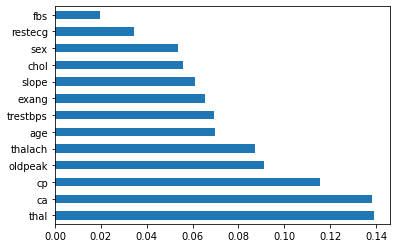

In [21]:
# idea 1
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column 
#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

<AxesSubplot:>

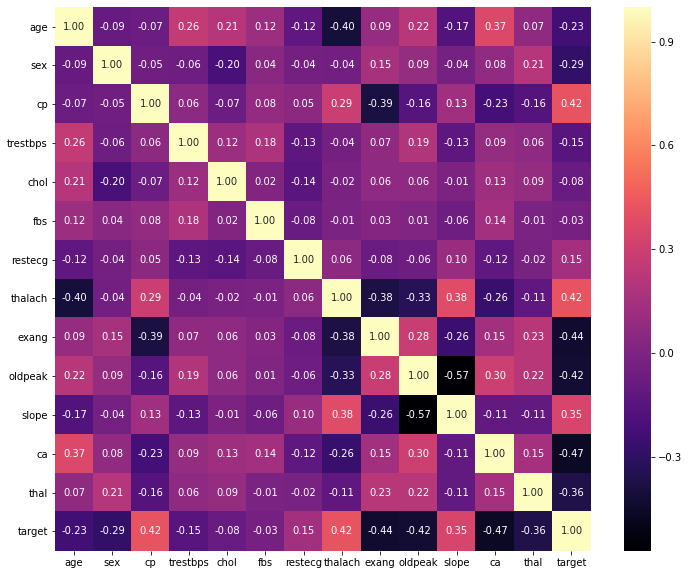

In [22]:
# idea 2
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

Text(0.5, 1.0, 'Gender v/s target\n')

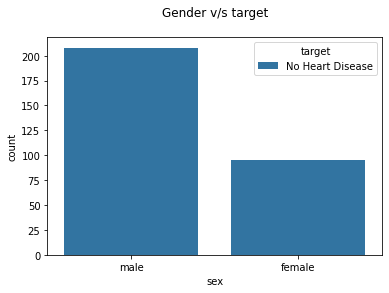

In [23]:
# idea 3
df2 = df.copy()
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex'] = df2['sex'].apply(chng)
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df2['target'] = df2['target'].apply(chng2)

df2['target'] = df2['target'].apply(chng2)
sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s target\n')

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

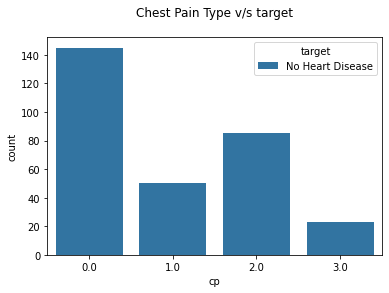

In [24]:
sns.countplot(data= df2, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

<AxesSubplot:xlabel='restecg', ylabel='chol'>

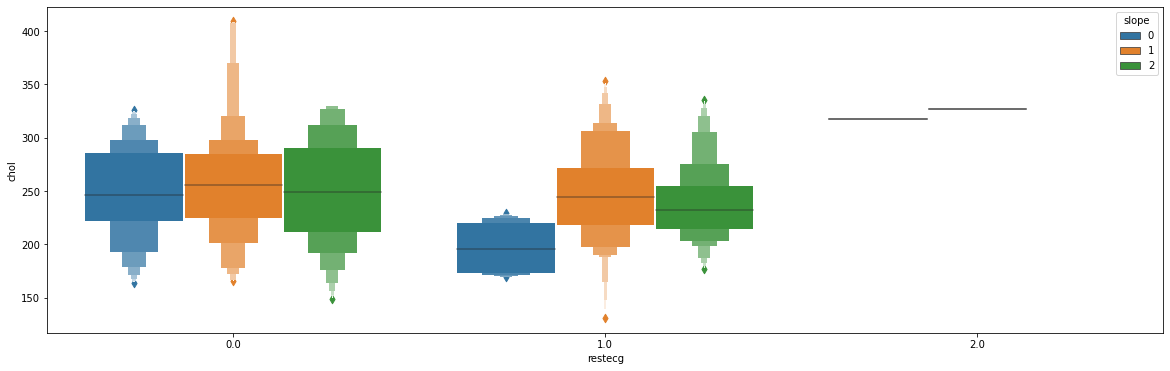

In [25]:
df4 = df[df['target'] == 0 ][['age', 'sex', 'cp', 'trestbps','chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak','slope', 'ca', 'thal', 'target']]
plt.figure(figsize=(20,6))
sns.boxenplot(data=df4,x='restecg',y='chol',hue='slope')

### Question 3 - Heavy Tailed distributions (10 points)

Recall the definition of Heavy Tailed distribtion from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

#### 3.A
Does the standard normal distribution have a heavy right tail? prove your answer.

No!

If $ X \sim N(0,1) $ 

then $ P(X>x)= 1 - \Phi (x)$


Therefore, $ \lim_{x\to\infty}  e^{tx}(1 - \Phi (x)) = \lim_{x\to\infty} \frac{(1 - \Phi (x))}{e^{-tx}}$


We shall notice that when x going to infinity, both part of the fraction going to 0 (by defenition $\Phi (x)$ goes to 1).

Thus, we shall use L'Hôpital and we will receive:

$ \lim_{x\to\infty}  \frac{-\frac{1}{\sqrt{2\pi}}e^{-0.5x^{2}}}{-te^{-tx}} $ (The numerator is the derivative of the CDF integral)

From certain x,  $ \lim_{x\to\infty} 0.5x^{2}-tx > 0 $,

Thus, $ \lim_{x\to\infty} \frac{1}{t\sqrt{2\pi}}e^{-(0.5x^{2}-tx)} = 0 $

And 0 is not $\infty$ therefore Normal Distribution has no heavy right tail.

$\blacksquare$


#### 3.B
Does the standard log-normal distribution have a heavy right tail? prove your answer.

Yes!

If $ X \sim Log\mathcal{-N}(0,1) $ 

then $ P(X>x)= 1 - \Phi (x)$


Therefore, $ \lim_{x\to\infty}  e^{tx}(1 - \Phi (x)) = \lim_{x\to\infty} \frac{(1 - \Phi (x))}{e^{-tx}}$


We shall notice that when x going to infinity, both part of the fraction going to 0 (by defenition $\Phi (x)$ goes to 1).

Thus, we shall use L'Hôpital and we will receive:


$ \lim_{x\to\infty}  \frac {{-\frac{1}{x\sqrt{2\pi}}}e^{-0.5(\ln{x})^{2}}}{-te^{-tx}} = \lim_{x\to\infty}  \frac{1}{tx\sqrt{2\pi}}e^{-0.5(\ln{x})^{2}+tx} $

Let us take a look at $-0.5(\ln{x})^{2}+tx$ :

 $A =  \lim_{x\to\infty} -0.5(\ln{x})^{2}+tx =  \lim_{x\to\infty} x(\frac{-0.5(\ln{x})^{2}}{x} + t)$

Now, let us take a look at $\lim_{x\to\infty} \frac{(\ln{x})^{2}}{x}$ :

Using L'Hôpital ($\infty : \infty$):

$B = \lim_{x\to\infty} \frac{(\ln{x})^{2}}{x} = \lim_{x\to\infty} \frac{2\ln{x}}{x}$

By using L'Hôpital again ($\infty : \infty$):

$B = \lim_{x\to\infty} \frac{1}{x} = 0 $

Thus, $ B=0 \rightarrow A =xt \rightarrow \lim_{x\to\infty}  \frac{1}{x\sqrt{2\pi}}e^{tx} $

And because $ e^{tx} >> x $ where $ x \rightarrow \infty $ :

$ \lim_{x\to\infty}  e^{tx}(1 - \Phi (x)) = \lim_{x\to\infty}  \frac{1}{tx\sqrt{2\pi}}e^{-0.5(\ln{x})^{2}+tx} = \infty $

As required.


$\blacksquare$

### Question 4 - CLT for Markov chains (20 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, $X_0$, is $U(1...6)$, i.e. $P(X_0=i)=\pi_0(i)=1/6, \forall i\in{\{1,..,6\}}$<br>
After i rolls are determined the $i+1^{st}, X_{i+1},$ is drawn according to the row that corresponds to the value of $X_i$ in the matrix $T$ below. <br>
In other words, $T$ is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

 in this case $X_0$, is $U(1...6)$, i.e. $P(X_0=i)=\pi_0(i)=1/6, \forall i\in{\{1,..,6\}}$<br>
 
 we know that $ \pi _0 $ is stationary distributed for T ( transition matrix )
 
 lets calculate the expectation of the mean of $X_0$: 
 
 $ E[X_0] = \sum_{n=1}^{6} X_0 P(X_0=i)= 1 \frac{1}{6} +2 \frac{1}{6} + 3 \frac{1}{6}+4\frac{1}{6}+ 5\frac{1}{6}+6\frac{1}{6}=3.5$
 
 now lets assume that  $\overline{X_n}  $ is the avg of a tranjectory, for some n.
 
 we have transition matrix T and that means that every $X_i$  had the same distribution as $X_0$
 
 
 $E[\overline{X_n}]=E[\frac{1}{n}(X_0+X_1+....+X_n-1)]= \frac{1}{n}(E[X_0]+E[X_1]+...+E[X_n-1])= \frac{1}{n}(E[X_0]+E[X_0]+....+E[X_0])=\frac{1}{n} n E[X_0]=E[X_0]$
 
 and from that we can say that 
 
 $E[\overline{X_n}]=E[X_0]=3.5$
 
 from what we calculated on the 1st part of this section .
 
 this is why our  answer to 4.1.A, 4.2.A  is 3.5 because it is true to all n from what we froove above  
 
 

In [26]:
# settings

T=np.array([[0.40,.20,.10 , 0 ,.10 ,.20], [.20,.40,.20,.10,0,.10]  ,[.10,.20,.40,.20,.10,0],[0,.10,.20,.40,.20,.10],[.10,0,.10,.20,.40,.20],[.20,.10,0,.10,.20,.4] ])

x_0_prob=np.array([0.166,0.166,0.166,0.166,0.166,0.166])

In [29]:
def create_tranjectories(T,num_of_t,leng,plot):
    results=np.zeros((num_of_t,leng))
    x_0=[1,2,3,4,5,6]
    for i in range(num_of_t):
        random_num_x_0=np.random.randint(low=1, high=7, size=1)
        results[i,0]=random_num_x_0
        k=random_num_x_0

        for j in range(1,leng):

            r=np.random.choice(x_0,1,p=T[k-1,:][0])

            results[i,j]=r
            k=r
    mean=np.mean(results,axis=1)

    
    m=mean.mean(0)
    s=np.std(mean)
    print(f'the distrubution looks like normal distribution and the empirical mean is {m}, the empirical std is {s}')
    if plot==True:
        ax=sns.distplot(mean,kde=False,fit=norm,norm_hist=True,bins=30)
        ax.set_title('Avg of tranjectories')
        ax.set(ylabel='Probability',xlabel='average')
        ax2=plt.twinx()
        ax2=sns.distplot(mean,kde=False, ax=ax2,bins=30)
        ax2.set_ylabel('count')
        plt.show()

            
    return results
            

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

1. we expect the average will be 3.5 - like we proove above


3.looks like normal distribution 

the distrubution looks like normal distribution and the empirical mean is 3.4760666666666666, the empirical std is 0.48656674316639803


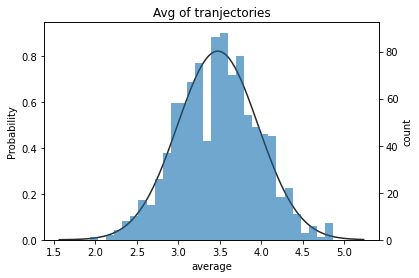

array([[5., 5., 5., ..., 5., 3., 4.],
       [3., 5., 4., ..., 5., 4., 2.],
       [4., 2., 2., ..., 5., 4., 5.],
       ...,
       [6., 4., 5., ..., 2., 6., 1.],
       [6., 5., 5., ..., 5., 6., 6.],
       [5., 4., 5., ..., 3., 3., 3.]])

In [30]:
create_tranjectories(T,num_of_t=1000,leng=30,plot=True)

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

1.we expect the average to be 3.5 like we proove above 


3.looks like normal distribution 

the distrubution looks like normal distribution and the empirical mean is 3.49754, the empirical std is 0.11939375360545458


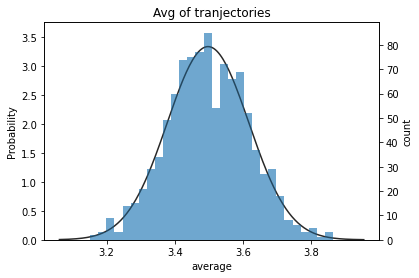

array([[4., 5., 4., ..., 4., 2., 2.],
       [4., 2., 2., ..., 1., 2., 3.],
       [2., 1., 1., ..., 4., 5., 1.],
       ...,
       [4., 4., 4., ..., 6., 4., 4.],
       [1., 6., 4., ..., 1., 2., 3.],
       [2., 1., 3., ..., 4., 3., 2.]])

In [31]:
create_tranjectories(T,num_of_t=1000,leng=500,plot=True)

#### 4.C
Draw normal fit curves on your two histograms.

in sections 4A and 4B we can see the normal fit on our histograms 

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

In [36]:

def markov_cov_calc(dice_values,T,t,p,prnt):
    r=np.shape(dice_values)[0]
    X= np.zeros((r,t))
    X[:,0]=dice_values
    cov=np.zeros((t))
    E_X0 = (dice_values*p[:]).sum()
    T_j=T
    for j in range(1,t):
        if j>=2:
            T_j=np.matmul(T_j,T)

        paij=np.matmul(p.T,T_j)

        E_X0Xj = 0
        for x in range(r):
            for y in range(r):
                E_X0Xj += (x+1)*(y+1)* T_j[x][y]

        E_X0Xj=E_X0Xj*(1/6)
        E_Xj = (dice_values*paij).sum()
        cov[j-1]=E_X0Xj-E_X0*E_Xj
    if prnt==True:
        plt.plot(cov)
        plt.xlabel('i')
        plt.ylabel('cov(X_0,X_i)')
        plt.show()
    return cov

    

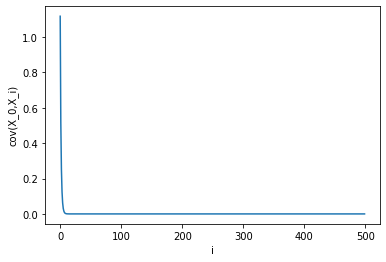

array([ 1.11666667e+00,  5.16666667e-01,  2.52666667e-01,  1.25466667e-01,
        6.25866667e-02,  3.12666667e-02,  1.56282667e-02,  7.81314667e-03,
        3.90637867e-03,  1.95315067e-03,  9.76567627e-04,  4.88282275e-04,
        2.44140830e-04,  1.22070353e-04,  6.10351644e-05,  3.05175798e-05,
        1.52587894e-05,  7.62939460e-06,  3.81469728e-06,  1.90734864e-06,
        9.53674320e-07,  4.76837160e-07,  2.38418581e-07,  1.19209290e-07,
        5.96046448e-08,  2.98023206e-08,  1.49011594e-08,  7.45058415e-09,
        3.72528852e-09,  1.86264870e-09,  9.31322575e-10,  4.65661287e-10,
        2.32830644e-10,  1.16415322e-10,  5.82094373e-11,  2.91056068e-11,
        1.45536916e-11,  7.27595761e-12,  3.63975516e-12,  1.82076576e-12,
        9.05941988e-13,  4.51194637e-13,  2.25597319e-13,  1.10134124e-13,
        5.50670620e-14,  2.48689958e-14,  1.42108547e-14,  7.10542736e-15,
        3.55271368e-15,  3.55271368e-15,  0.00000000e+00, -1.77635684e-15,
       -1.77635684e-15,  

In [37]:
x_0=np.array([1,2,3,4,5,6])
markov_cov_calc(x_0,T,500,np.array([1/6,1/6,1/6,1/6,1/6,1/6]),prnt=True)

#### 4.E - Bonus
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that 
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

1. we proove it at the beginning of question 4 


we saw that $E(\overline{X_n})=E(X_0)=3.5$




2.

lets assume that our n=500

$X_0=[1/6,1/6,1/6,1/6,1/6,1/6]$  -> meaning that the varianve of $Var(X_0)=0$ 

because all probabilities are the same .

so the first part of this formula equal to 0.




In [43]:
# 2

n=500
x0=np.array([1/6,1/6,1/6,1/6,1/6,1/6])
cov=markov_cov_calc(np.array([1,2,3,4,5,6]),T,n,x0,prnt=False)
tot=0
for d in range(1,n-1):
    tot+=(n-d)*cov[d]
    

var=(np.var(x0)/n)+(2/n**2)*tot

print(var)

0.0
0.004063438786006812


3.

For finite state spaces, all irreducible and aperiodic Markov chains are uniformly ergodic.


Hence, the Markov chain CLT would hold for any function 𝑓 that has a finite second moment. The form the CLT takes is described as follows.


Let $\overline{f_n}$  be the time averaged estimator of $E_\pi [f]$ .


as $n  \rightarrow \infty$

$\overline{f_n} = \frac{1}{n}  \sum_{n=1}^{n} f(X_i) \rightarrow E_\pi[f] $


The markov chain CLT is :


$\sqrt{n}(\overline{f_n}-E_\pi[f]) \rightarrow N(0,\sigma^{2}) $


where :


$\sigma^{2}= Var_\pi(f(X_1))+2 \sum_{k=1}^{\infty} Cov_\pi(f(X_1),f(X_{1+K}))$


meaning $\sigma^{2}= expected \ term\ + term\ duo\ to \ markov \ chain $





source https://math.stackexchange.com/questions/2814116/detailed-proof-of-central-limit-theorem-for-markov-chains

4. unfortunatlly we did not had enough time to finish this part 

### Question 5 - Sampling of Kendall correlation (15 points)

Recall that the Naive time complexity of computing Kendall correlation is $O(n^2)$. We will investigate a sampling approach to approximate Kendall correlations efficiently. 

In [44]:
# settings

import timeit
random.seed(0)

mean = np.array([0,0])

S = np.array([[2,3],
              [3,5]])

#### 5.A
Draw a sample of 10M samples from a bivariate distribution $(X,Y)\sim \mathcal{N}(\bf{0},S)$ with the covariance matrix $S=\begin{pmatrix} 2 & 3\\ 3 & 5 \end{pmatrix}$. <br>
Calculate the Kendall correlation $\tau(X,Y)$.
How long did this calculation take?

In [45]:
#call time
from scipy.stats import multivariate_normal


#conduct a 10M sample and calculate Tau
sample = np.random.multivariate_normal(mean=mean, cov=S, size=10_000_000)
transpose_sample = np.transpose(sample)

In [46]:
#calculate running time
start = timeit.default_timer()
tau_value_big_sample = stats.kendalltau(transpose_sample[0],transpose_sample[1])

#call time again
stop = timeit.default_timer()

print(f'The Kendall corr is: {round(tau_value_big_sample[0],4)}, and the running time for 10M is {round(stop - start,5)}')

The Kendall corr is: 0.7951, and the running time for 10M is 9.05683


#### 5.B
Sample 1,000 points from the data and calculate the Kendall correlation $\tau(U,V)$. 

In [47]:
# Function to calculate Tau, based on sampeling n samples from the sample conducted in A
def calc_tau(n):
    k_sample = sample[np.array([random.randint(1,10_000_000) for x in range(n)])]
    transpose_k = np.transpose(k_sample)
    k_tau_value = stats.kendalltau(transpose_k[0],transpose_k[1])
    return k_tau_value[0]

In [48]:
print(f'The Kendall corr of the 1K random sample is: {round(calc_tau(1_000),4)}')

The Kendall corr of the 1K random sample is: 0.8019


#### 5.C
Repeat Section 5.B 1000 times and plot a histogram of the calculated $\tau(U,V)$ values. Indicate the true $\tau(X,Y)$ (calculated on the entire 10M samples) on the histogram. What are the empirical mean and stadard deviation of the calculated $\tau(U,V)$ values?

In [49]:
# calculate 1000 times the Tau of 1000 samples from the real sample, and gather in list
taus_array = []
for i in range (1_000):
    taus_array.append(calc_tau(1_000))

The mean of Taus is: 0.795, the STD is: 0.007



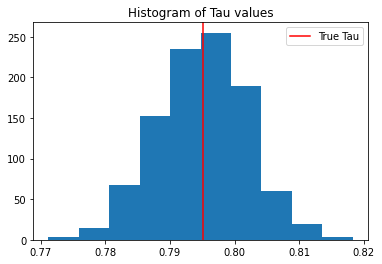

In [50]:
# printing and plotting

true_tau = tau_value_big_sample[0]
print(f'The mean of Taus is: {round(statistics.mean(taus_array),3)}, the STD is: {round(statistics.pstdev(taus_array),3)}\n')
plt.hist(taus_array)
plt.title('Histogram of Tau values')
plt.axvline(x=true_tau, color='r', label='axvline - full height')
plt.legend(['True Tau'])
plt.show()

#### 5.D
Repeat Section 5.C for samples of $m={10, 50, 100, 500, 1000, 5000}$ points. <br>
What is the naive time complexity of each calculation? <br>
Compare the empirical time complexity and the standard deviation of the calucated values to the size of the sample.

In [51]:
# settings Tuas arrays for each scenario
taus_array_10 = []
taus_array_50 = []
taus_array_100 = []
taus_array_500 = []
taus_array_1000 = []
taus_array_5000 = []

# settings time counter for each scenario
tim_com_10 = 0
tim_com_50 = 0
tim_com_100 = 0
tim_com_500 = 0
tim_com_1000 = 0
tim_com_5000 = 0

# iterating 1_000 times, over all scenarios, and adding the time to the time counter
for i in range (1_000):
    start = timeit.default_timer()
    
    taus_array_10.append(calc_tau(10))
    stop_1 = timeit.default_timer()
    tim_com_10 += stop_1-start
    
    taus_array_50.append(calc_tau(50))
    stop_2 = timeit.default_timer()
    tim_com_50 += stop_2-start
   
    taus_array_100.append(calc_tau(1_00))
    stop_3 = timeit.default_timer()
    tim_com_100 += stop_3-start
    
    taus_array_500.append(calc_tau(5_00))
    stop_4 = timeit.default_timer()
    tim_com_500 += stop_4-start

    taus_array_1000.append(calc_tau(1_000))
    stop_5 = timeit.default_timer()
    tim_com_1000 += stop_5-start
    
    taus_array_5000.append(calc_tau(5_000))
    stop_6 = timeit.default_timer()
    tim_com_5000 += stop_6-start

# conducting average time for each scenario    
avg_time_10 = tim_com_10/1000
avg_time_50 = tim_com_50/1000
avg_time_100 = tim_com_100/1000
avg_time_500 = tim_com_500/1000
avg_time_1000 = tim_com_1000/1000
avg_time_5000 = tim_com_5000/1000
time_array = [avg_time_10, avg_time_50, avg_time_100, avg_time_500, avg_time_1000, avg_time_5000]

# conducting STD for each scenario
std_10 = statistics.pstdev(taus_array_10)
std_50 = statistics.pstdev(taus_array_50)
std_100 = statistics.pstdev(taus_array_100)
std_500 = statistics.pstdev(taus_array_500)
std_1000 = statistics.pstdev(taus_array_1000)
std_5000 = statistics.pstdev(taus_array_5000)
std_array = [std_10,std_50,std_100,std_500,std_1000,std_5000]

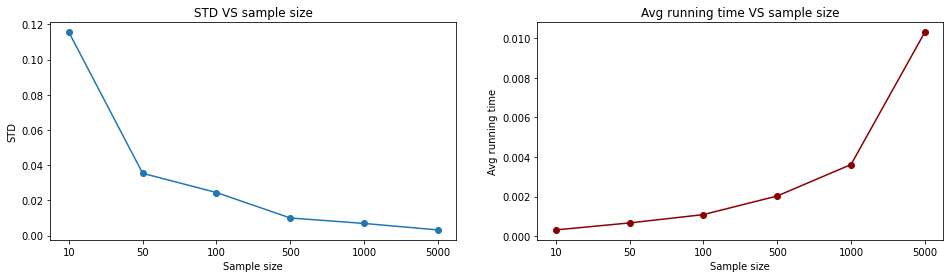

In [54]:
#Plotting
##############################################
#What is the naive time comlexity???
##############################################


values_lst = ['10','50','100','500','1000','5000']
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

axes[0].plot(values_lst,std_array,'-o')
axes[0].set_title('STD VS sample size')
axes[0].set_ylabel('STD')
axes[0].set_xlabel('Sample size')


axes[1].plot(values_lst,time_array,'-o',color="darkred")
axes[1].set_title('Avg running time VS sample size')
axes[1].set_ylabel('Avg running time')
axes[1].set_xlabel('Sample size')
plt.show()

#### 5.E
A coleague found an old dataset which she believes originated from the same popuation as the data in Section 5.A. The dataset is avaialble as "Kendall_data.csv". 

Using Kendall correlation and your answer to Section 5.D, how much confidence do you have in rejecting your coleague's claim? Explain your answer and show your calculation.

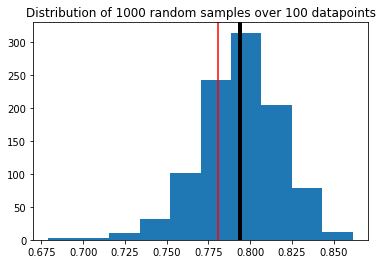




5.D mean sample is: 0.794
5.D STD sample is: 0.024
The coleague Tau is: 0.781
The gap from the mean to the coleague Tua is 0.013, which is less than 1 STD
The p-value of Tau_coleague, as calculated over the sample as the population, is: 0.295,
Which is far from 0.05 - our golden point of rejecting the hypothesis.
Therefore, we will not reject the NULL model and
We will claim that the coleague dataset came from the same distibution as the big sample


In [55]:
########### settings ##############

kendall_data = pd.read_csv('Kendall_data.csv',header = None)
tau_coleague = stats.kendalltau(kendall_data[0],kendall_data[1])[0]

# Plotting the 1000 random sampling over 100 random samples
plt.hist(taus_array_100)
plt.title('Distribution of 1000 random samples over 100 datapoints')

plt.axvline(x=tau_coleague,c='r')


###########
# By observing, we can notice that it is distribute normaly
###########

mean_100_sample_tau = statistics.mean(taus_array_100)
std_100_sample_tau = statistics.pstdev(taus_array_100)

plt.axvline(x=mean_100_sample_tau,c='k',linewidth=4)
plt.show()

# Finding the P-value of Tau_coleague
z_score = (tau_coleague-mean_100_sample_tau)/std_100_sample_tau
p_value = stats.norm.sf(abs(z_score))

print(f'\n\n\n'
      f'5.D mean sample is: {round(mean_100_sample_tau,3)}\n'
      f'5.D STD sample is: {round(std_100_sample_tau,3)}\n'
      f'The coleague Tau is: {round(tau_coleague,3)}\n'
      f'The gap from the mean to the coleague Tua is {round(mean_100_sample_tau-tau_coleague,3)}, which is less than 1 STD\n'
      f'The p-value of Tau_coleague, as calculated over the sample as the population, is: {round(p_value,3)},\n'
      f'Which is far from 0.05 - our golden point of rejecting the hypothesis.\n'
      f'Therefore, we will not reject the NULL model and\n'
      f'We will claim that the coleague dataset came from the same distibution as the big sample')


